In [1]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded=files.upload()

Saving weather_data.csv to weather_data.csv


In [2]:
df=pd.read_csv('weather_data.csv')

In [3]:
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,16-05-2024 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50:00,18:50:00,12:12:00,01:11:00,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,16-05-2024 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21:00,19:54:00,12:58:00,02:14:00,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,16-05-2024 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40:00,19:50:00,13:15:00,02:14:00,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,16-05-2024 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31:00,21:11:00,14:12:00,03:31:00,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,16-05-2024 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12:00,17:55:00,13:17:00,00:38:00,Waxing Gibbous,55


In [4]:
df.shape

(84614, 41)

In [5]:
df.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84614 entries, 0 to 84613
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       84614 non-null  object 
 1   location_name                 84613 non-null  object 
 2   latitude                      84614 non-null  float64
 3   longitude                     84614 non-null  float64
 4   timezone                      84614 non-null  object 
 5   last_updated_epoch            84614 non-null  int64  
 6   last_updated                  84614 non-null  object 
 7   temperature_celsius           84614 non-null  float64
 8   temperature_fahrenheit        84614 non-null  float64
 9   condition_text                84614 non-null  object 
 10  wind_mph                      84614 non-null  float64
 11  wind_kph                      84614 non-null  float64
 12  wind_degree                   84614 non-null  int64  
 13  w

In [7]:
df=df.drop(columns=['last_updated_epoch', 'last_updated',
       'temperature_fahrenheit', 'sunrise',
       'sunset', 'moonrise', 'moonset'])

In [8]:
df.isnull().sum()

,0
country,0
location_name,1
latitude,0
longitude,0
timezone,0
temperature_celsius,0
condition_text,0
wind_mph,0
wind_kph,0
wind_degree,0


In [9]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['country', 'timezone', 'wind_direction', 'moon_phase', 'location_name']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [10]:
df

,country,location_name,latitude,longitude,timezone,temperature_celsius,condition_text,wind_mph,wind_kph,wind_degree,...,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_phase,moon_illumination
0,0,97,34.5200,69.1800,107,26.6,Partly Cloudy,8.3,13.3,338,...,277.00,103.0,1.100,0.200,8.400,26.600,1,1,7,55
1,1,224,41.3300,19.8200,171,19.0,Partly cloudy,6.9,11.2,320,...,193.60,97.3,0.900,0.100,1.100,2.000,1,1,7,55
2,2,10,36.7600,3.0500,2,23.0,Sunny,9.4,15.1,280,...,540.70,12.2,65.100,13.400,10.400,18.400,1,1,7,55
3,3,13,42.5000,1.5200,137,6.3,Light drizzle,7.4,11.9,215,...,170.20,64.4,1.600,0.200,0.700,0.900,1,1,7,55
4,4,121,-8.8400,13.2300,28,26.0,Partly cloudy,8.1,13.0,150,...,2964.00,19.0,72.700,31.500,183.400,262.300,5,10,7,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84609,200,57,10.5000,-66.9167,52,23.4,Partly cloudy,4.3,6.8,164,...,830.65,61.0,17.945,7.400,26.825,58.645,2,3,6,2
84610,201,85,21.0333,105.8500,93,34.0,Light rain shower,3.6,5.8,168,...,1504.05,93.0,71.595,99.530,174.085,174.455,5,10,6,1
84611,202,204,15.3547,44.2067,86,27.7,Sunny,8.5,13.7,297,...,220.15,91.0,2.405,2.590,17.945,83.620,2,2,6,1
84612,203,122,-15.4167,28.2833,29,21.1,Sunny,11.0,17.6,96,...,490.25,78.0,1.850,2.775,12.765,13.505,1,2,6,2


In [11]:
from sklearn.model_selection import train_test_split
Y = df[['latitude', 'longitude', 'condition_text']]
X = df.drop(['latitude', 'longitude', 'condition_text'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [12]:
X_train.shape, X_test.shape

((59229, 31), (25385, 31))

In [13]:
y_train.shape, y_test.shape

((59229, 3), (25385, 3))

In [14]:
df.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'temperature_celsius', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'moon_phase',
       'moon_illumination'],
      dtype='object')

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[['air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5','temperature_celsius','precip_in', 'air_quality_PM10', 'humidity', 'pressure_mb', 'uv_index', 'visibility_km', 'cloud']])
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[['air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5','temperature_celsius','precip_in', 'air_quality_PM10', 'humidity', 'pressure_mb', 'uv_index', 'visibility_km', 'cloud']]=scaler.transform(X_train_scaled[['air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'temperature_celsius','precip_in','air_quality_PM10','humidity', 'pressure_mb', 'uv_index', 'visibility_km', 'cloud']])
X_test_scaled[['air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'temperature_celsius','precip_in','air_quality_PM10', 'humidity', 'pressure_mb', 'uv_index', 'visibility_km', 'cloud']]=scaler.transform(X_test_scaled[['air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5','temperature_celsius', 'precip_in','air_quality_PM10', 'humidity', 'pressure_mb', 'uv_index', 'visibility_km', 'cloud']])

In [45]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

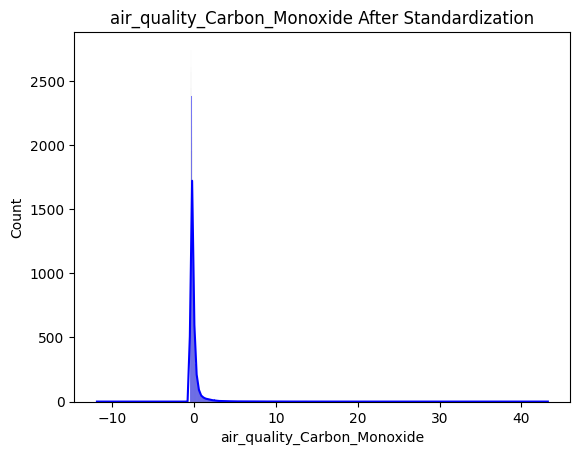

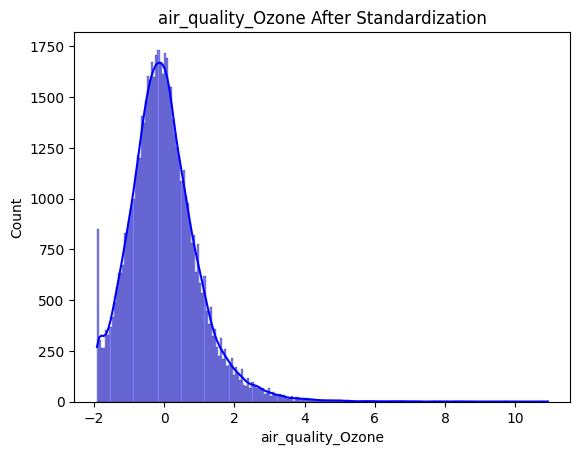

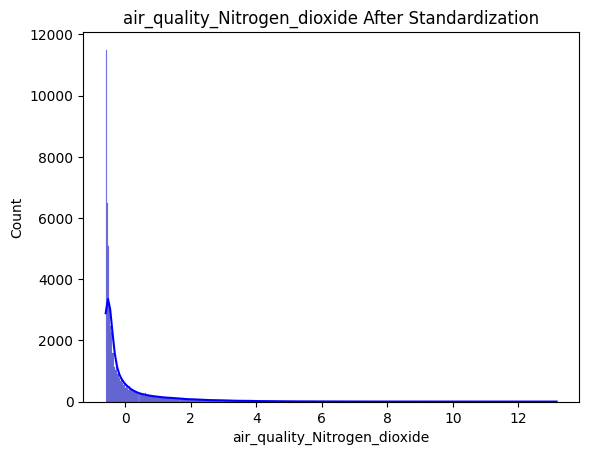

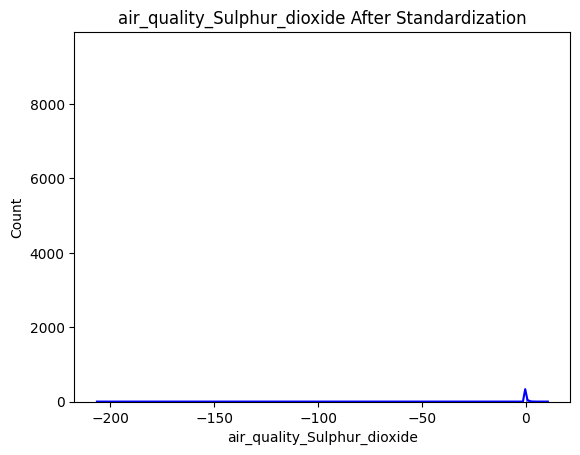

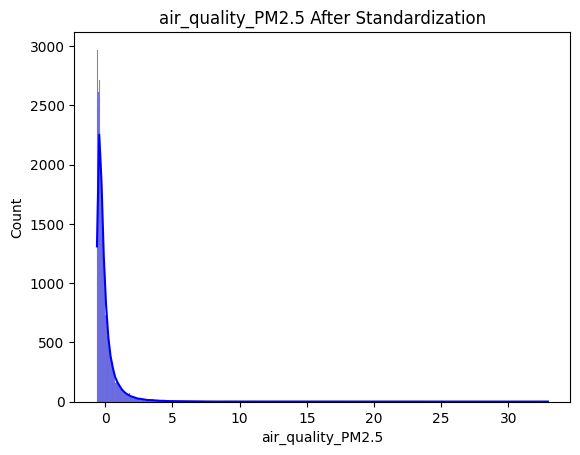

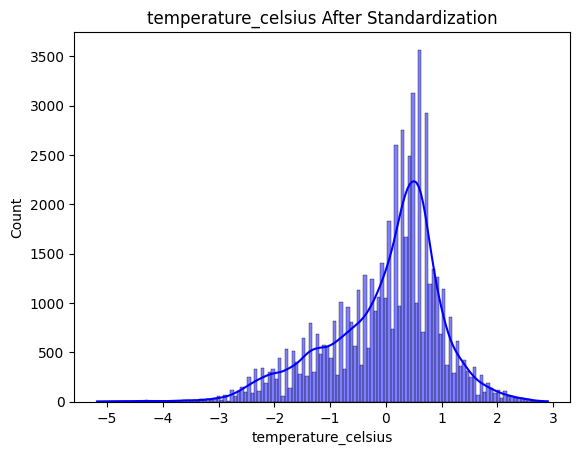

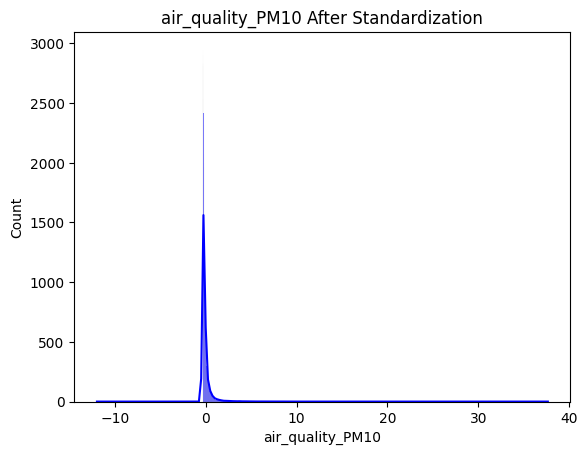

In [16]:
import seaborn as sns
from matplotlib import pyplot as plt
columns = ['air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5','temperature_celsius', 'air_quality_PM10']
for col in columns:
    #plt.subplot(1, 2, 1)
    sns.histplot(X_train_scaled[col], kde=True, color='blue')
    plt.title(f'{col} After Standardization')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [17]:
X_train_scaled.head()

,country,location_name,timezone,temperature_celsius,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,...,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_phase,moon_illumination
73146,6,53,46,-1.885044,3.8,6.1,237,15,0.814639,30.27,...,0.594973,-1.434617,0.298693,-0.076559,-0.411391,-0.280160,1,1,6,6
21175,93,110,113,2.064572,15.7,25.2,325,7,-0.958694,29.56,...,-0.319935,3.223297,-0.465306,-0.113373,0.629745,1.649080,3,6,6,0
47742,81,75,146,-2.223271,5.6,9.0,180,8,0.814639,30.27,...,-0.240946,0.061181,0.298693,-0.152869,-0.358404,-0.191646,1,1,5,83
55829,202,204,86,0.089764,6.5,10.4,238,15,0.001861,29.94,...,-0.199254,1.018491,-0.585350,-0.202470,-0.230350,0.050602,2,2,3,0
35905,77,154,110,0.755307,4.7,7.6,311,7,-0.072028,29.90,...,2.185513,0.031265,1.503557,0.717066,2.308642,0.502490,4,10,5,95


In [18]:
air_quality_cols = ['air_quality_Carbon_Monoxide',
                    'air_quality_Ozone',
                    'air_quality_Nitrogen_dioxide',
                    'air_quality_Sulphur_dioxide',
                    'air_quality_PM2.5',
                    'air_quality_PM10']

X_train_air = X_train_scaled[air_quality_cols]
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_air_pca = pca.fit_transform(X_train_air)
X_train_air_pca_df = pd.DataFrame(X_train_air_pca, columns=['PC1', 'PC2'])
X_train_air_pca_df

,PC1,PC2
0,0.205211,-1.414136
1,0.250256,3.470082
2,-0.287720,-0.192746
3,-0.631599,0.899282
4,3.457165,-0.025991
...,...,...
59224,-0.996329,0.377341
59225,-0.602431,0.820365
59226,-0.556692,0.173318
59227,2.178920,-0.296467


In [19]:
X_test_air = X_test_scaled[air_quality_cols]
X_test_air_pca = pca.transform(X_test_air)
X_test_air_pca_df = pd.DataFrame(X_test_air_pca, columns=['PC1', 'PC2'])

X_test_rest = X_test.drop(columns=air_quality_cols)
X_test_final = pd.concat([X_test_rest.reset_index(drop=True), X_test_air_pca_df.reset_index(drop=True)], axis=1)

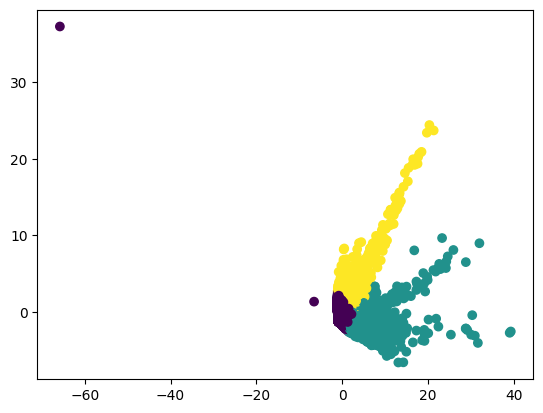

In [20]:
y=['air_quality_Carbon_Monoxide',
                    'air_quality_Ozone',
                    'air_quality_Nitrogen_dioxide',
                    'air_quality_Sulphur_dioxide',
                    'air_quality_PM2.5',
                    'air_quality_PM10']
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_train_air_pca)
plt.scatter(X_train_air_pca[:,0], X_train_air_pca[:,1], c=clusters)

In [21]:
#Training the model
y_train_lat=y_train['latitude']
y_train_long=y_train['longitude']
y_train_cond=y_train['condition_text']

y_test_lat=y_test['latitude']
y_test_long=y_test['longitude']
y_test_cond=y_test['condition_text']

In [22]:
X_train_rest = X_train.drop(columns=air_quality_cols)
X_train_final = pd.concat([X_train_rest.reset_index(drop=True), X_train_air_pca_df.reset_index(drop=True)], axis=1)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
model=LinearRegression()
model.fit(X_train_final, y_train_lat)
y_pred_lat =model.predict(X_test_final)
print("Latitude Prediction:")
print("MAE:", mean_absolute_error(y_test_lat, y_pred_lat))
print("MSE:", mean_squared_error(y_test_lat, y_pred_lat))
print("R2 Score:", r2_score(y_test_lat, y_pred_lat))

Latitude Prediction:
MAE: 15.369031633511804
MSE: 412.621657379547
R2 Score: 0.3047529420071048


In [56]:
model = LinearRegression()
model.fit(X_train_final, y_train_long)
y_pred_long = model.predict(X_test_final)
print("Longitude Prediction:")
print("MAE:", mean_absolute_error(y_test_long, y_pred_long))
print("MSE:", mean_squared_error(y_test_long, y_pred_long))
print("R2 Score:", r2_score(y_test_long, y_pred_long))


Longitude Prediction:
MAE: 41.3069327192224
MSE: 3051.7437669986352
R2 Score: 0.2932429553620085


In [57]:
from sklearn.tree import DecisionTreeRegressor
model_lat = DecisionTreeRegressor(max_depth=10, random_state=17)
model_lat.fit(X_train_final, y_train_lat)
y_pred = model_lat.predict(X_test_final)
print("MAE:", mean_absolute_error(y_test_lat, y_pred_lat))
print("MSE:", mean_squared_error(y_test_lat, y_pred_lat))
print("R2 Score:", r2_score(y_test_lat, y_pred_lat))

MAE: 15.369031633511804
MSE: 412.621657379547
R2 Score: 0.3047529420071048


In [58]:
from sklearn.tree import DecisionTreeRegressor
model_long = DecisionTreeRegressor(max_depth=10, random_state=17)
model_long.fit(X_train_final, y_train_long)
y_pred = model_long.predict(X_test_final)
print("MAE:", mean_absolute_error(y_test_long, y_pred_long))
print("MSE:", mean_squared_error(y_test_long, y_pred_long))
print("R2 Score:", r2_score(y_test_long, y_pred_long))

MAE: 41.3069327192224
MSE: 3051.7437669986352
R2 Score: 0.2932429553620085


In [27]:
#relatively bigger error is coming

In [59]:
import joblib
joblib.dump(model_lat, 'model_lat.pkl')
joblib.dump(model_long, 'model_long.pkl')

['model_long.pkl']

In [28]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y_train_encoded = le.fit_transform(y_train_cond)
y_test_encoded = le.transform(y_test_cond)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
clf = RandomForestClassifier()
clf.fit(X_train_final, y_train_encoded)
y_pred = clf.predict(X_test_final)

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy= accuracy_score(y_test_encoded, y_pred)
precision= precision_score(y_test_encoded, y_pred, average='weighted')
recall= recall_score(y_test_encoded, y_pred,average='weighted')
f1= f1_score(y_test_encoded, y_pred,average='weighted')
print(f"Accuracy:{accuracy:.4f}")
print(f"Precision:{precision:.4f}")
print(f"Recall:{recall:.4f}")
print(f"F1 Score:{f1:.4f}")

Accuracy:  0.8644
Precision: 0.8562
Recall:    0.8644
F1 Score:  0.8490


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

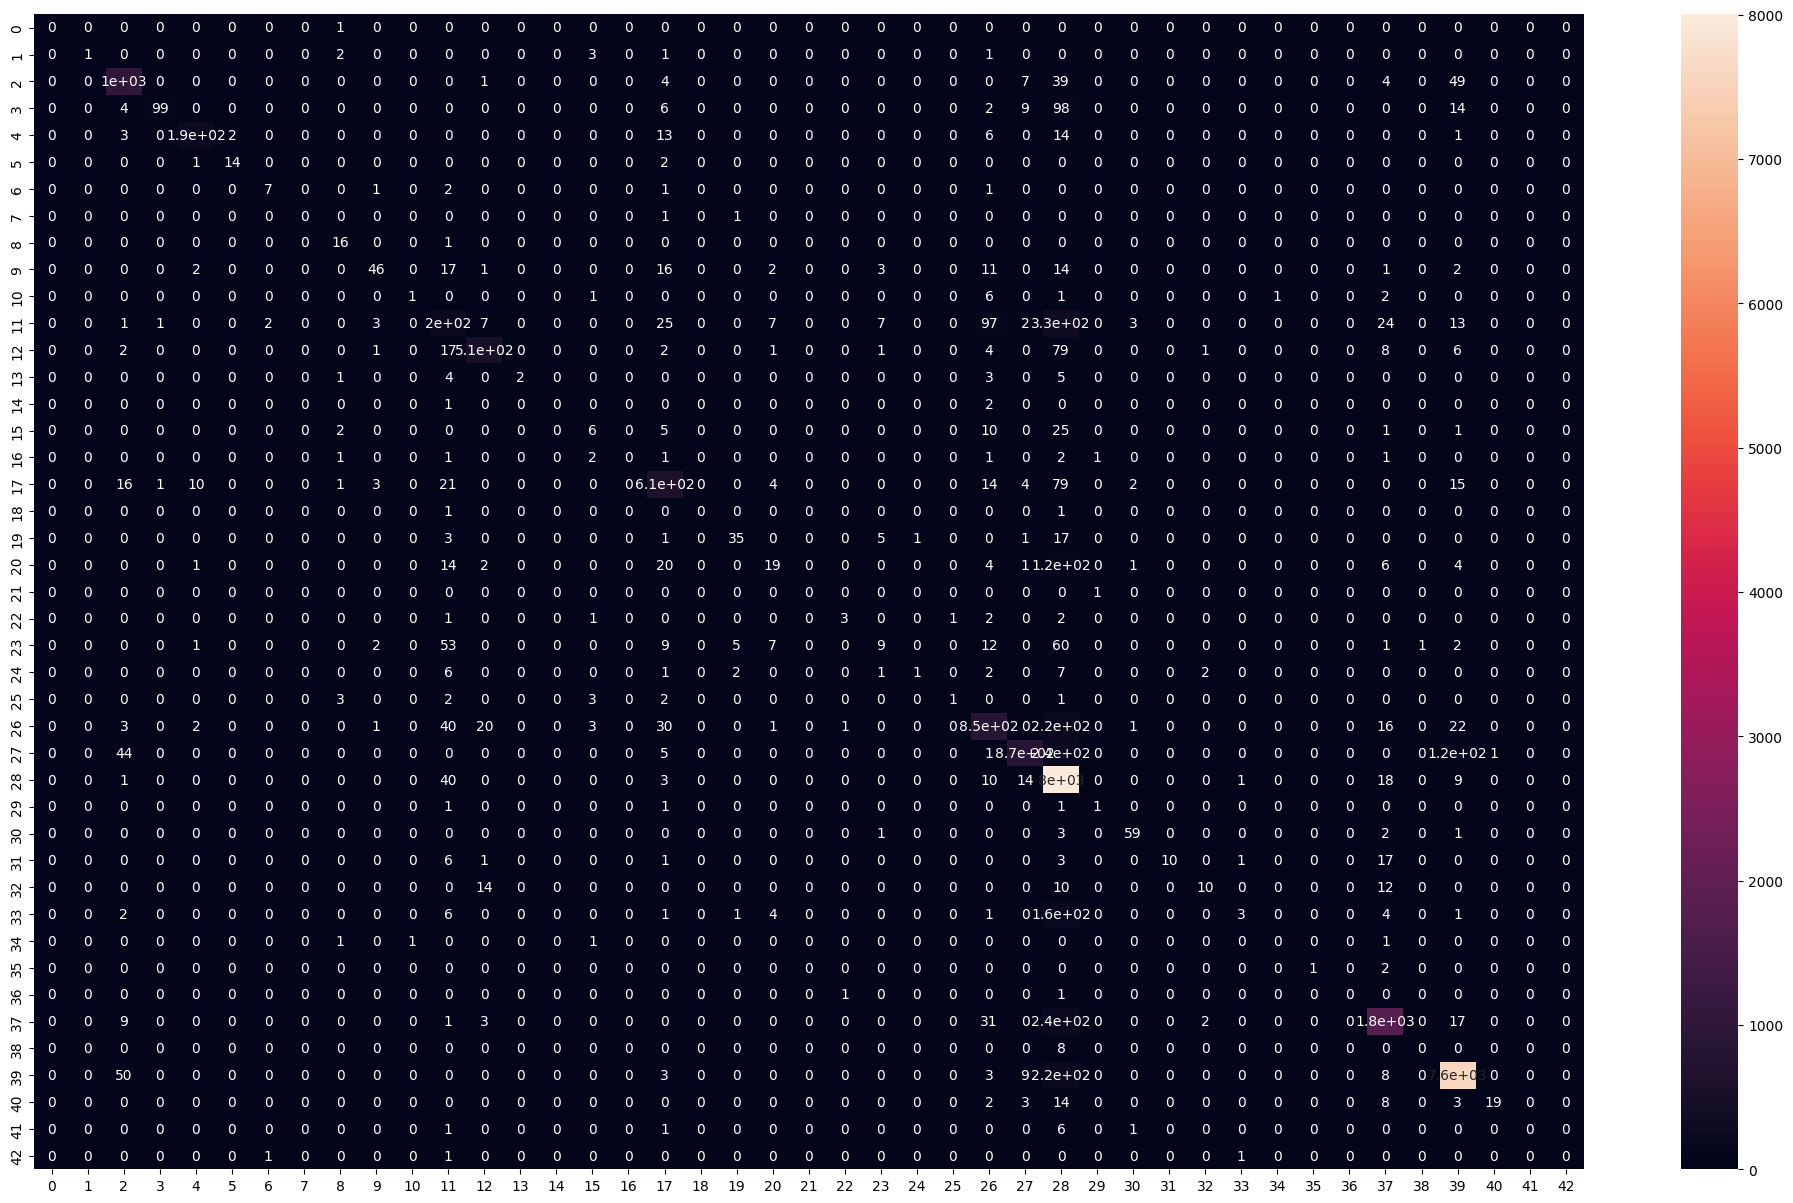

In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_encoded,y_pred)
plt.figure(figsize=(25, 15))
sns.heatmap(cm,annot=True)

In [34]:
uploaded = files.upload()
new_df = pd.read_excel('weather_test.xlsx')
new_df.to_csv('weather_test_converted.csv', index=False)
files.download('weather_test_converted.csv')

Saving weather_test.xlsx to weather_test (1).xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
new_df

,country,location_name,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Romania,Bucharest,Europe/Bucharest,1747903500,2025-05-22 11:45:00,23.4,74.1,2.2,3.6,224,...,22.200,30.710,2,2,05:42:00,20:44:00,02:58:00,15:00:00,Waning Crescent,35
1,Marshall Islands,Majuro,Pacific/Majuro,1717942500,2024-06-10 02:15:00,28.4,83.0,6.5,10.4,71,...,0.900,3.600,1,1,06:18:00,18:49:00,08:29:00,21:25:00,Waxing Crescent,7
2,Vietnam,Hanoi,Asia/Bangkok,1733049000,2024-12-01 17:30:00,23.1,73.6,8.5,13.7,139,...,79.550,80.845,4,10,06:17:00,17:14:00,06:11:00,17:05:00,New Moon,0
3,Mauritius,Port Louis,Indian/Mauritius,1736246700,2025-01-07 14:45:00,30.1,86.2,14.1,22.7,82,...,12.950,19.055,1,2,05:38:00,18:55:00,12:36:00,No moonset,First Quarter,48
4,Mozambique,Maputo,Africa/Maputo,1731142800,2024-11-09 11:00:00,28.3,82.9,6.9,11.2,30,...,16.280,25.715,2,2,04:55:00,18:12:00,11:28:00,00:24:00,First Quarter,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Slovakia,Bratislava,Europe/Bratislava,1726915500,2024-09-21 12:45:00,21.3,70.3,9.4,15.1,128,...,13.320,16.095,1,2,06:37:00,18:51:00,20:12:00,11:05:00,Waning Gibbous,88
146,Jordan,Amman,Asia/Amman,1721737800,2024-07-23 15:30:00,32.7,90.8,19.0,30.6,282,...,15.200,20.700,1,2,05:46:00,19:39:00,21:27:00,07:40:00,Waning Gibbous,97
147,Greece,Athens,Europe/Athens,1733393700,2024-12-05 12:15:00,17.3,63.1,5.6,9.0,74,...,14.245,19.795,1,2,07:26:00,17:06:00,11:12:00,20:56:00,Waxing Crescent,14
148,South Korea,Seoul,Asia/Seoul,1722861000,2024-08-05 21:30:00,28.9,84.0,3.4,5.4,244,...,90.200,97.200,4,10,05:40:00,19:36:00,06:00:00,20:19:00,Waxing Crescent,0


In [37]:
import joblib
cols_to_drop = ['last_updated_epoch', 'last_updated', 'temperature_celsius', 'temperature_fahrenheit', 'sunrise', 'sunset', 'moonrise', 'moonset', 'location_name']
new_df = new_df.drop(columns=cols_to_drop, errors='ignore')

In [43]:
categorical_cols = ['country', 'timezone', 'wind_direction', 'moon_phase']
for col in categorical_cols:
    le = LabelEncoder()
    new_df[col] = le.fit_transform(new_df[col].astype(str))

In [60]:
scaler = joblib.load("scaler.pkl")
model_lat = joblib.load('model_lat.pkl')
model_long = joblib.load('model_long.pkl')

In [61]:
scaler = joblib.load("scaler.pkl")
X_scaled = scaler.transform(new_df)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- air_quality_gb-defra-index
- air_quality_us-epa-index
- country
- feels_like_celsius
- feels_like_fahrenheit
- ...
Feature names seen at fit time, yet now missing:
- temperature_celsius


In [ ]:
lat_pred = model_lat.predict(X_scaled)
lon_pred = model_long.predict(X_scaled)